In [1]:
#Install required libraries
!pip install scikit-learn pandas matplotlib seaborn

In [2]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("SuperKart.csv")
df

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82


In [4]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [5]:
#shape
df.shape


(8763, 12)

In [6]:
#info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [7]:
#finding missing value
df.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [8]:
# finding % of missing value
df.isnull().sum()/df.shape[0]*100

Product_Id                   0.0
Product_Weight               0.0
Product_Sugar_Content        0.0
Product_Allocated_Area       0.0
Product_Type                 0.0
Product_MRP                  0.0
Store_Id                     0.0
Store_Establishment_Year     0.0
Store_Size                   0.0
Store_Location_City_Type     0.0
Store_Type                   0.0
Product_Store_Sales_Total    0.0
dtype: float64

In [9]:
#finding duplicates
df.duplicated().sum()

0

In [10]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Product_Id
FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: count, Length: 8763, dtype: int64
******************************
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
******************************
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
******************************
Store_Id
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: count, dty

In [11]:
#Exploratory data Analysis(EDA)
#descriptive statistics
df.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640
std,2.217320,0.048204,30.694110,8.388381,1065.630494
min,4.000000,0.004000,31.000000,1987.000000,33.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000


In [12]:
df.describe(include="object")

,Product_Id,Product_Sugar_Content,Product_Type,Store_Id,Store_Size,Store_Location_City_Type,Store_Type
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,4,16,4,3,3,4
top,FD6114,Low Sugar,Fruits and Vegetables,OUT004,Medium,Tier 2,Supermarket Type2
freq,1,4885,1249,4676,6025,6262,4676


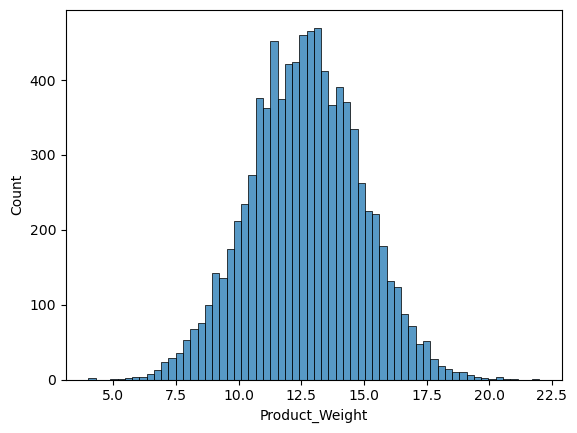

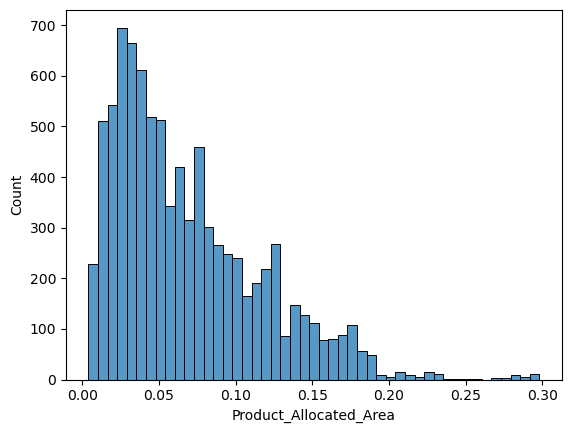

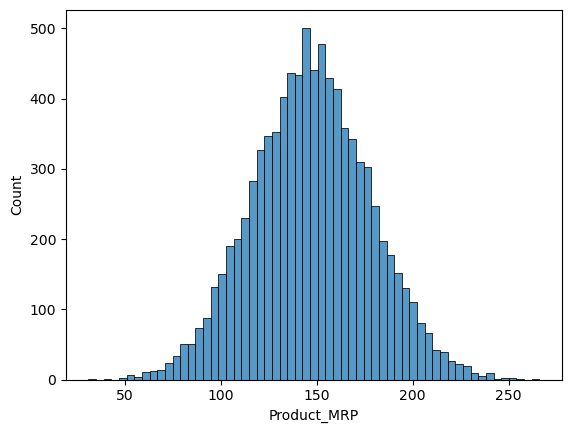

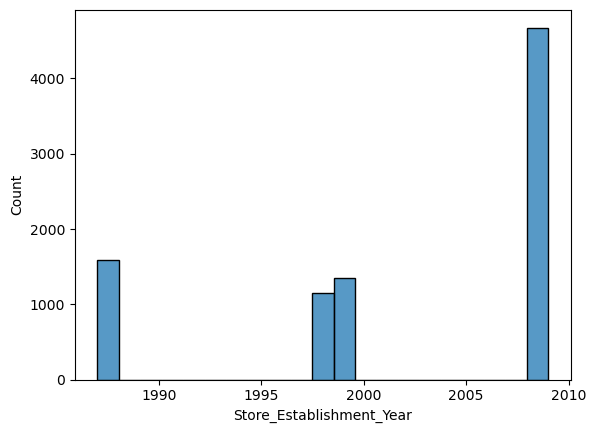

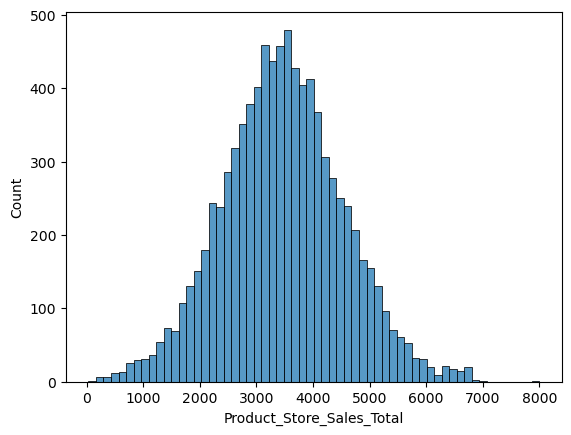

In [13]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

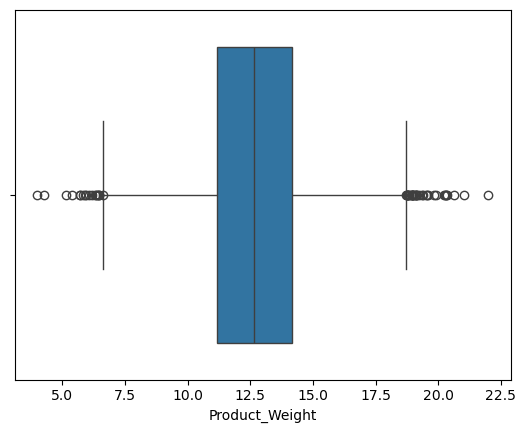

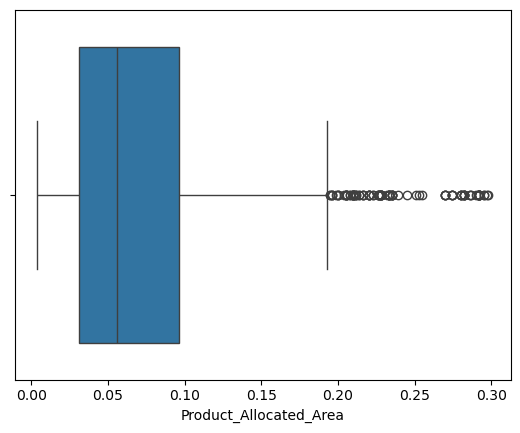

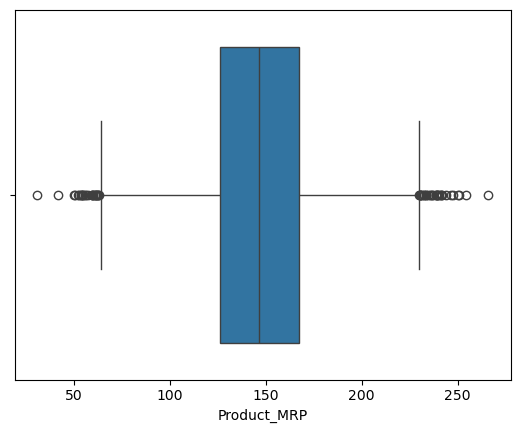

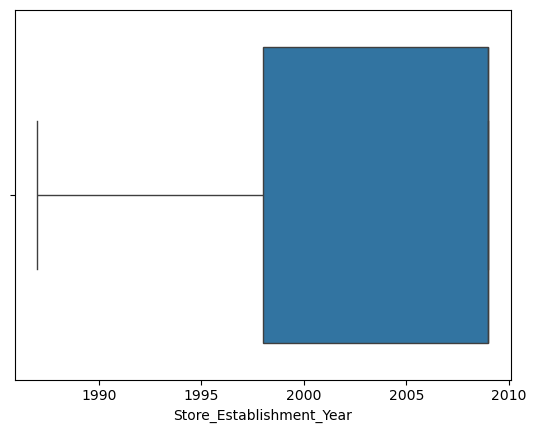

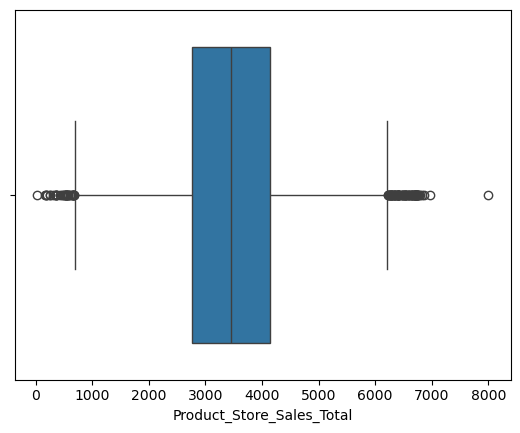

In [14]:
#Boxplot-to-identify Outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [15]:
df.select_dtypes(include="number")

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
0,12.66,0.027,117.08,2009,2842.40
1,16.54,0.144,171.43,1999,4830.02
2,14.28,0.031,162.08,1987,4130.16
3,12.10,0.112,186.31,1987,4132.18
4,9.57,0.010,123.67,1998,2279.36
...,...,...,...,...,...
8758,14.80,0.016,140.53,2009,3806.53
8759,14.06,0.142,144.51,2009,5020.74
8760,13.48,0.017,88.58,1987,2443.42
8761,13.89,0.193,168.44,1987,4171.82


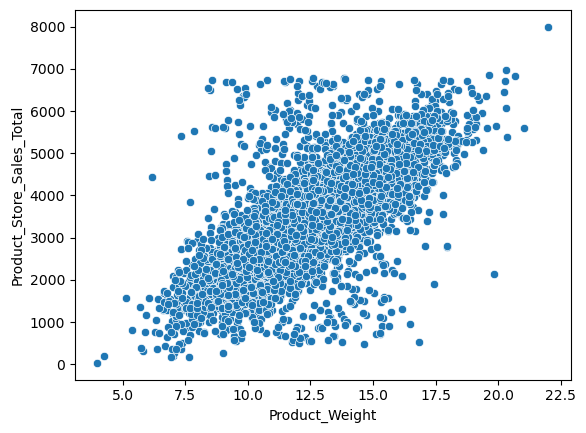

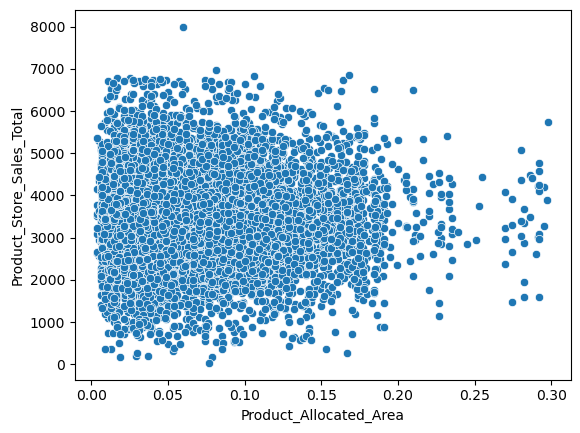

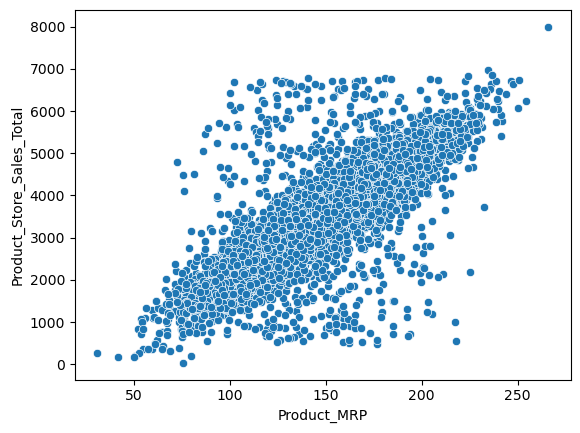

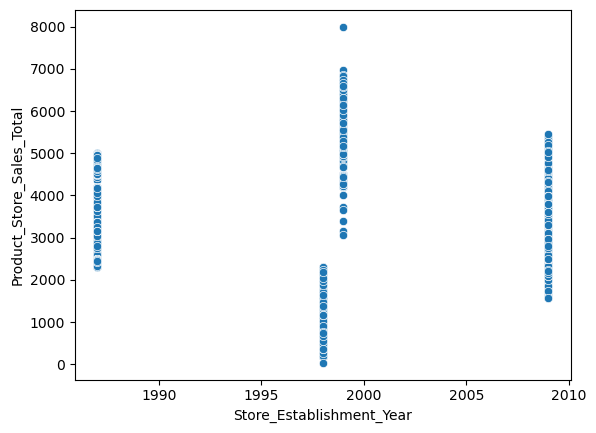

In [16]:
#scatter plot to understand the relationship
for i in ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
       'Store_Establishment_Year']:
    sns.scatterplot(data=df,x=i,y='Product_Store_Sales_Total')
    plt.show()

In [17]:
df.select_dtypes(include="number").columns

Index(['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
       'Store_Establishment_Year', 'Product_Store_Sales_Total'],
      dtype='object')

In [18]:
#correlation with heatmap to interpret the relation and multicolliniarity
df.select_dtypes(include="number").corr()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
Product_Weight,1.000000,0.014754,0.532716,-0.161907,0.737955
Product_Allocated_Area,0.014754,1.000000,-0.009508,0.004467,-0.000933
Product_MRP,0.532716,-0.009508,1.000000,-0.189357,0.787989
Store_Establishment_Year,-0.161907,0.004467,-0.189357,1.000000,-0.185027
Product_Store_Sales_Total,0.737955,-0.000933,0.787989,-0.185027,1.000000


In [19]:
s=df.select_dtypes(include="number").corr()

<Axes: >

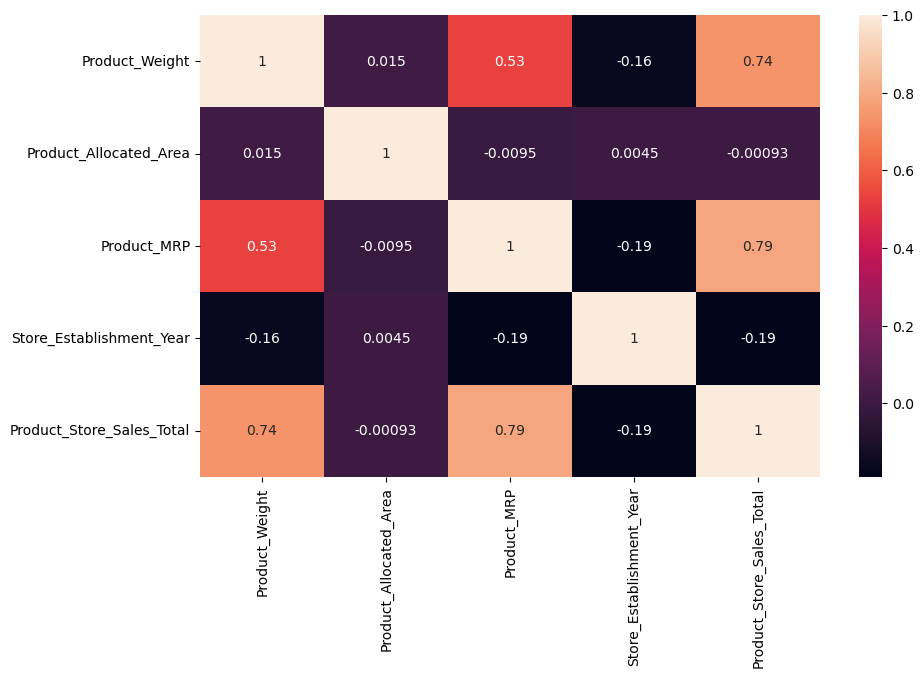

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(s,annot=True)

In [21]:
#missing value treatment
df.isnull().sum()


Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [22]:
#Outliers treatment
def  wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [23]:
wisker(df['Product_Allocated_Area'])

(-0.0665, 0.1935)

In [24]:
for i in ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

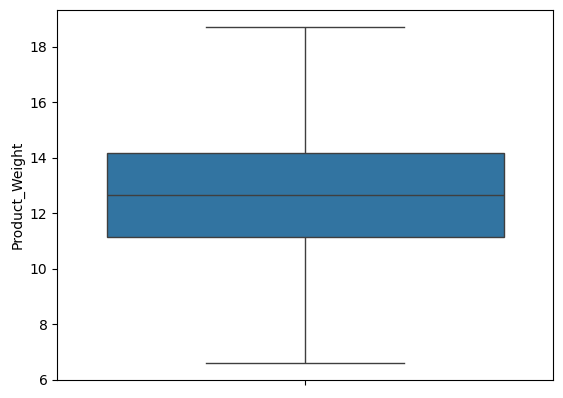

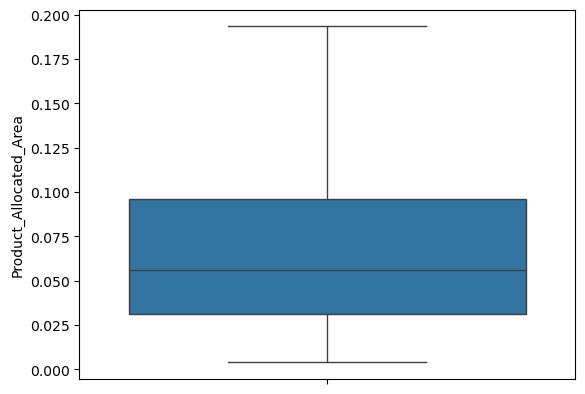

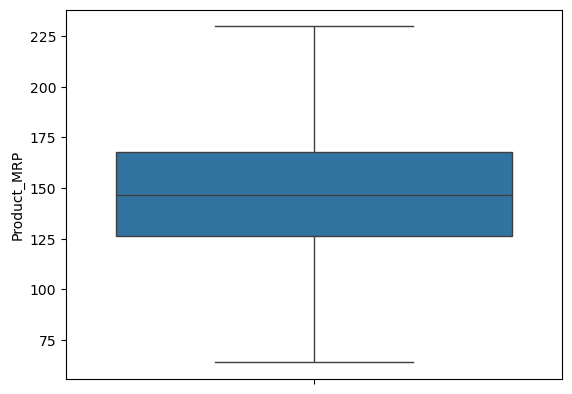

In [25]:
for i in ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP']:
    sns.boxplot(df[i])
    plt.show()

In [26]:
df.drop_duplicates()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82


In [27]:
pd.get_dummies(data=df,columns=["Product_Sugar_Content","Product_Type","Store_Size","Store_Type"],drop_first=True)

,Product_Id,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Id,Store_Establishment_Year,Store_Location_City_Type,Product_Store_Sales_Total,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,...,Product_Type_Others,Product_Type_Seafood,Product_Type_Snack Foods,Product_Type_Soft Drinks,Product_Type_Starchy Foods,Store_Size_Medium,Store_Size_Small,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,FD6114,12.66,0.027,117.08,OUT004,2009,Tier 2,2842.40,False,False,...,False,False,False,False,False,True,False,False,False,True
1,FD7839,16.54,0.144,171.43,OUT003,1999,Tier 1,4830.02,False,False,...,False,False,False,False,False,True,False,False,False,False
2,FD5075,14.28,0.031,162.08,OUT001,1987,Tier 2,4130.16,False,True,...,False,False,False,False,False,False,False,False,True,False
3,FD8233,12.10,0.112,186.31,OUT001,1987,Tier 2,4132.18,False,False,...,False,False,False,False,False,False,False,False,True,False
4,NC1180,9.57,0.010,123.67,OUT002,1998,Tier 3,2279.36,True,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,NC7546,14.80,0.016,140.53,OUT004,2009,Tier 2,3806.53,True,False,...,False,False,False,False,False,True,False,False,False,True
8759,NC584,14.06,0.142,144.51,OUT004,2009,Tier 2,5020.74,True,False,...,False,False,False,False,False,True,False,False,False,True
8760,NC2471,13.48,0.017,88.58,OUT001,1987,Tier 2,2443.42,True,False,...,False,False,False,False,False,False,False,False,True,False
8761,NC7187,13.89,0.193,168.44,OUT001,1987,Tier 2,4171.82,True,False,...,False,False,False,False,False,False,False,False,True,False


array([[<Axes: title={'center': 'Product_Weight'}>,
        <Axes: title={'center': 'Product_Allocated_Area'}>],
       [<Axes: title={'center': 'Product_MRP'}>,
        <Axes: title={'center': 'Store_Establishment_Year'}>],
       [<Axes: title={'center': 'Product_Store_Sales_Total'}>, <Axes: >]],
      dtype=object)

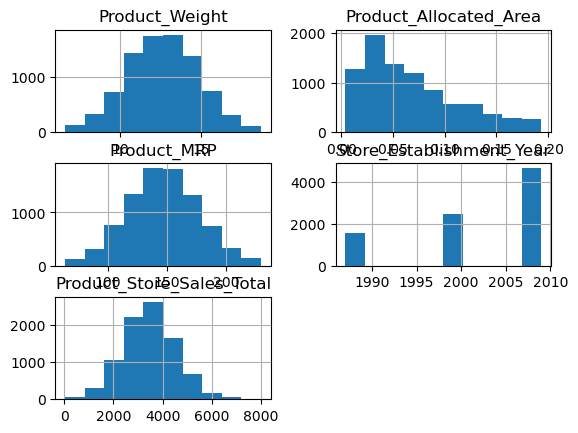

In [28]:
df.hist()


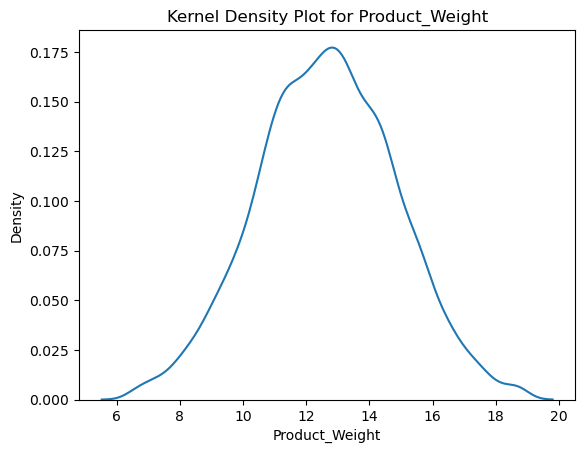

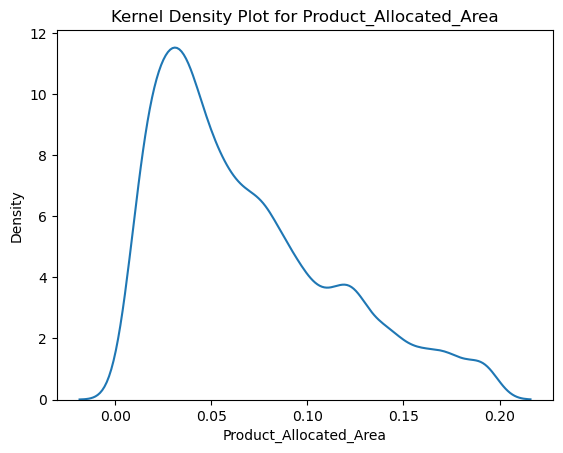

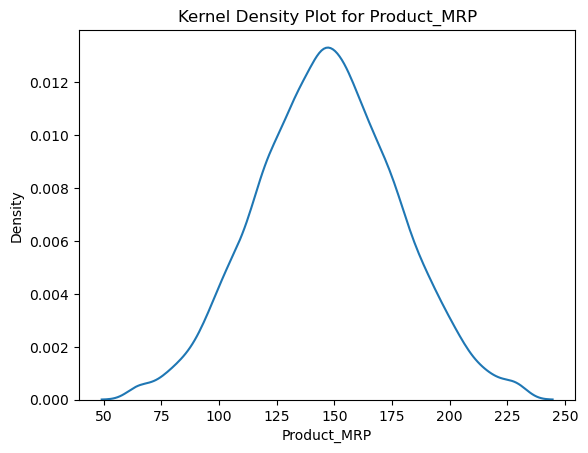

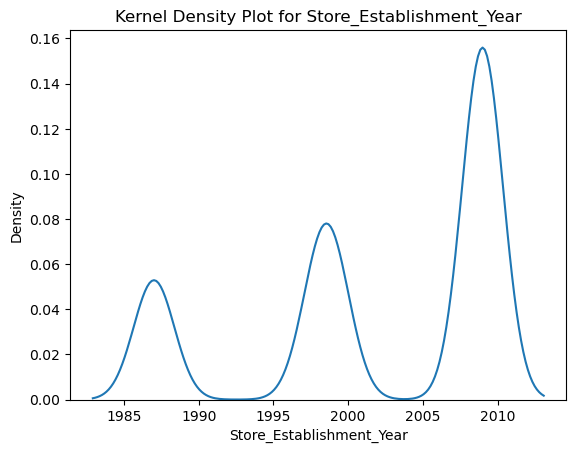

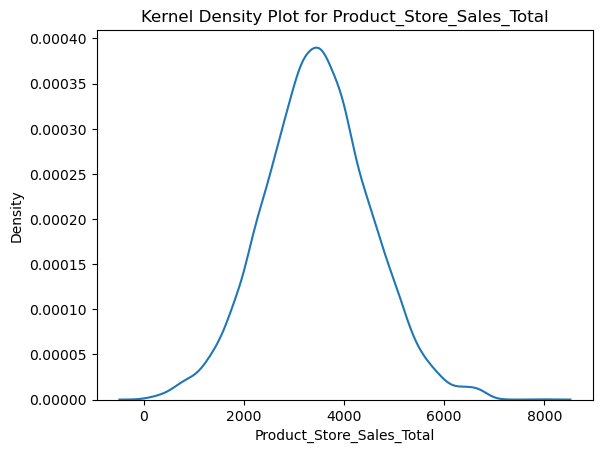

In [29]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df is a DataFrame
for i in df.select_dtypes(include=["float", "int"]).columns:  # Select only numeric columns
    sns.kdeplot(data=df, x=i)
    plt.title(f"Kernel Density Plot for {i}")
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.show()


In [30]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=df.drop() 

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'